In [26]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [2]:
env = gym.make('FrozenLake8x8-v1', render_mode='human' , is_slippery=True)
print("Observation Space ", env.observation_space) #64 spaces
print("Number of Actions ", env.action_space) # 4 actions


Observation Space  Discrete(64)
Number of Actions  Discrete(4)


In [3]:
#PROBABILITY
for state in range(env.observation_space.n):
    for action in range(env.action_space.n):
        transitions = env.P[state][action]
        print(f"State {state}, Action {action}:")
        for prob, next_state, reward, done in transitions:
            print(f"  Probability: {prob}, Next State: {next_state}, Reward: {reward}, Done: {done}")


State 0, Action 0:
  Probability: 0.3333333333333333, Next State: 0, Reward: 0.0, Done: False
  Probability: 0.3333333333333333, Next State: 0, Reward: 0.0, Done: False
  Probability: 0.3333333333333333, Next State: 8, Reward: 0.0, Done: False
State 0, Action 1:
  Probability: 0.3333333333333333, Next State: 0, Reward: 0.0, Done: False
  Probability: 0.3333333333333333, Next State: 8, Reward: 0.0, Done: False
  Probability: 0.3333333333333333, Next State: 1, Reward: 0.0, Done: False
State 0, Action 2:
  Probability: 0.3333333333333333, Next State: 8, Reward: 0.0, Done: False
  Probability: 0.3333333333333333, Next State: 1, Reward: 0.0, Done: False
  Probability: 0.3333333333333333, Next State: 0, Reward: 0.0, Done: False
State 0, Action 3:
  Probability: 0.3333333333333333, Next State: 1, Reward: 0.0, Done: False
  Probability: 0.3333333333333333, Next State: 0, Reward: 0.0, Done: False
  Probability: 0.3333333333333333, Next State: 0, Reward: 0.0, Done: False
State 1, Action 0:
  Pro

In [4]:
num_iterations = 1000
gamma = .99

In [21]:



def value_iteration(env):
    

    
    threshold =  1e-6 #convergence of the value function

    
    
    # Initialize the value table with zeros
    value_table = np.zeros(env.observation_space.n)

    delta_values = []  # Track the maximum delta value across iterations
    rewards_list = []  # Track the total reward across iterations

    for _ in range(num_iterations):
        updated_value_table = np.copy(value_table)
        max_delta = 0  # Track the maximum delta value for this iteration

        for s in range(env.observation_space.n):
            v = value_table[s]
            bellman_backup = [
                sum([prob*(r + gamma * updated_value_table[s_])
                     for prob, s_, r, _ in env.P[s][a]])
                for a in range(env.action_space.n)
            ]
            value_table[s] = max(bellman_backup)
            max_delta = max(max_delta, abs(v - value_table[s]))  # Update max_delta

        delta_values.append(max_delta)

        total_reward = np.sum(value_table)  # Calculate the total reward
        rewards_list.append(total_reward)

        if max_delta <= threshold:
            break

    return value_table, delta_values, rewards_list


def extract_policy(value_table):
    policy = np.zeros(env.observation_space.n)

    for s in range(env.observation_space.n):
        Q_values = [
            sum([prob*(r + gamma * value_table[s_])
                 for prob, s_, r, _ in env.P[s][a]])
            for a in range(env.action_space.n)
        ]
        policy[s] = np.argmax(np.array(Q_values))
        

    return policy


def plot_policy(env, V, gamma=0.99):
    policy = np.zeros(env.observation_space.n, dtype=int)

    for s in range(env.observation_space.n):
        bellman_backup = [
            sum([p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][a]])
            for a in range(env.action_space.n)
        ]
        policy[s] = np.argmax(bellman_backup)

    policy_grid = policy.reshape(env.desc.shape)

    cmap = ListedColormap(['#FFFFFF', '#000000', '#003366', '#00CC66'])
    plt.imshow(policy_grid, cmap=cmap, interpolation='none')
    plt.title('Optimal Policy')
    plt.colorbar()
    plt.show()
    plt.close()


def plot_convergence(delta_values):
    plt.plot(delta_values, color='#87CEEB', linewidth=3)  # Increase line width for better visibility
    plt.fill_between(range(len(delta_values)), delta_values, color='#87CEEB', alpha=0.3)  # Fill area under the line
    plt.xlabel('Iteration')
    plt.ylabel('Max Delta (Change in V)')
    plt.title('Value Iteration Convergence')
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.2) 
    plt.show()

def plot_rewards(rewards_list):
    plt.plot(rewards_list, color='green', linewidth=2)  # Increase line width for better visibility
    plt.fill_between(range(len(rewards_list)), rewards_list, color='green', alpha=0.5)  # Fill area under the line
    plt.xlabel('Iterations')
    plt.ylabel('Total Reward')
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.2) 
    plt.title('Rewards during Value Iteration')
    plt.show()
    

# Other functions remain unchanged


def get_score(env, policy, episodes=num_iterations):
    success_count = 0
    for _ in range(episodes):
        observation = env.reset()[0]  # Extracting the first element of the observation tuple
        while True:
            action = policy[observation]  # Index policy using the observation
            step_result = env.step(action)
            next_observation, reward, done, _ = step_result[:4]  # Unpack only the first four elements
            if done:
                if reward == 1:
                    success_count += 1
                break
            observation = next_observation
    success_rate = (success_count / episodes) * 100
    print('----------------------------------------------')
    print('Success Rate is : {:.2f}%'.format(success_rate))
    print('----------------------------------------------')

def plot_values(value_table):
    value_grid = value_table.reshape(env.desc.shape)
    sns.heatmap(value_grid, annot=True, fmt=".2f", cbar=True)
    plt.title('State Values')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()



optimal_value_function, delta_values, rewards_list = value_iteration(env=env)
optimal_policy = extract_policy(optimal_value_function)

print("****************************************")
print("Optimal policy is ", optimal_policy)
print("****************************************")



****************************************
Optimal policy is  [3. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 2. 2. 1. 3. 3. 0. 0. 2. 3. 2. 1.
 3. 3. 3. 1. 0. 0. 2. 2. 0. 3. 0. 0. 2. 1. 3. 2. 0. 0. 0. 1. 3. 0. 0. 2.
 0. 0. 1. 0. 0. 0. 0. 2. 0. 1. 0. 0. 1. 2. 1. 0.]
****************************************


In [22]:
get_score(env, optimal_policy, 1000) 

----------------------------------------------
Success Rate is : 91.00%
----------------------------------------------


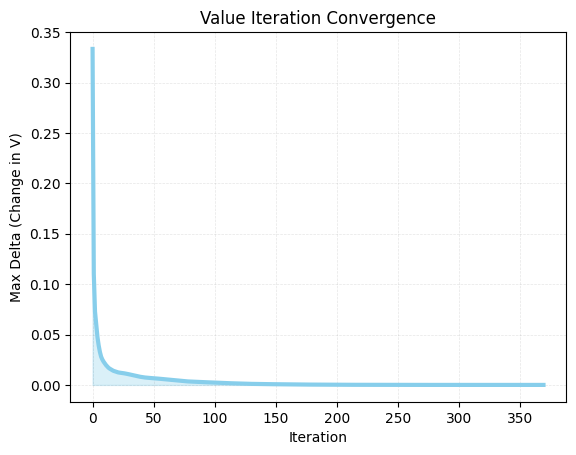

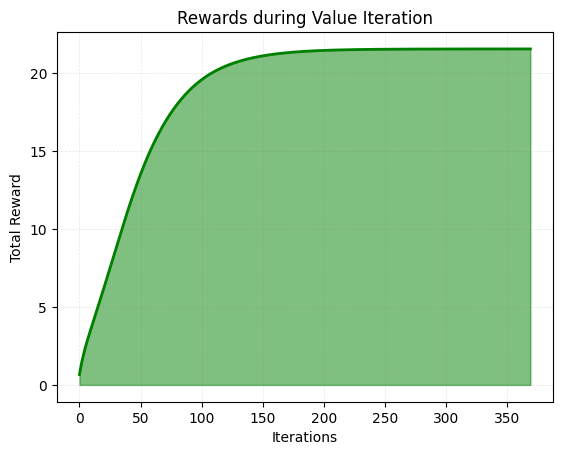

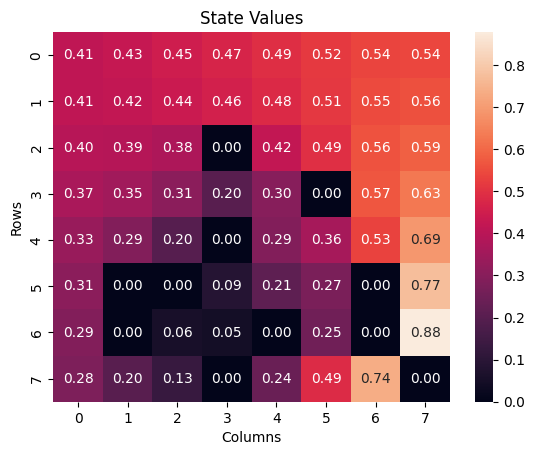

In [23]:
plot_convergence(delta_values)
plot_rewards(rewards_list)
plot_values(optimal_value_function)

In [24]:
# This will render the Environment with optimal policy
import time

def visualize_agent(env, optimal_policy):
    observation = env.reset()[0]  # Reset the environment and get initial observation
    done = False  # Initialize done flag
    env.render()  # Render the initial state

    while not done:
        action = int(optimal_policy[observation])  # Choose action based on the optimal policy
        observation, reward, done, _ = env.step(action)[:4]  # Take action and get results
        time.sleep(0.5)  # Add a delay for visualization
        env.render()  # Render the new state

    env.close()  # Close the environment after rendering

# Call the function to visualize the agent
visualize_agent(env, optimal_policy)


/Users/mumukshapant/myenv/lib/python3.12/site-packages/gym/envs/toy_text/frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake8x8-v1", render_mode="rgb_array")
  logger.warn(


In [ ]:
#optimal policy
3 2 2 2 2 2 2 2 3 3 3 3 2 2 2 1 3 3 0 0 2 3 2 1 3 3 3 1 0 0 2 1 3 3 0 0 2
 1 3 2 0 0 0 1 3 0 0 2 0 0 1 0 0 0 0 2 0 1 0 0 1 1 1 0

# Q LEARNING


In [33]:
env = gym.make('FrozenLake8x8-v1', is_slippery=True)

# Initialize the Q-table
Q = np.random.uniform(low=0, high=0.01, size=(
    env.observation_space.n, env.action_space.n))

# QLearning parameters
lr = 0.8          # learning rate
gamma = 0.99      # discount factor
epsilon = 0.1      # exploration rate
num_episodes = 10000  # Number of episodes


# performance metrics
total_rewards = []
total_steps = []
success_rate = []

# Q-learning algo uses the bellman update rule
for episode in range(num_episodes):
    state, info = env.reset()
    done = False
    episode_reward = 0
    episode_steps = 0

    while not done:
        if np.random.rand() < epsilon: # Epsilon-greedy action selection
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(Q[state])  #else exploit

        next_state, reward, done, _, info = env.step(action)

        
        Q[state, action] = Q[state, action] + lr * \
            (reward + gamma * np.max(Q[next_state]) - Q[state, action])  #  q value updating here 

        state = next_state
        episode_reward += reward
        episode_steps += 1

    # Store episode metrics
    total_rewards.append(episode_reward)
    total_steps.append(episode_steps)
    success_rate.append(int(episode_reward > 0))

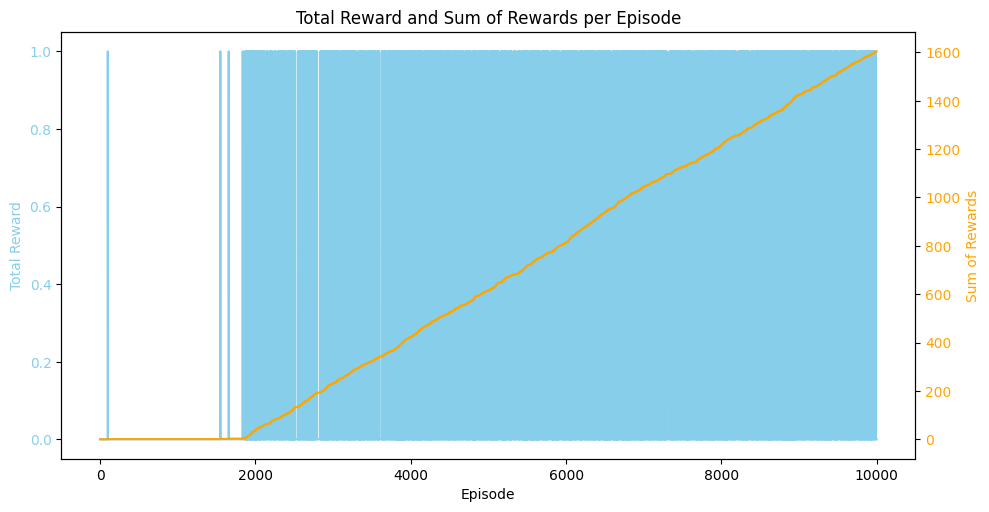

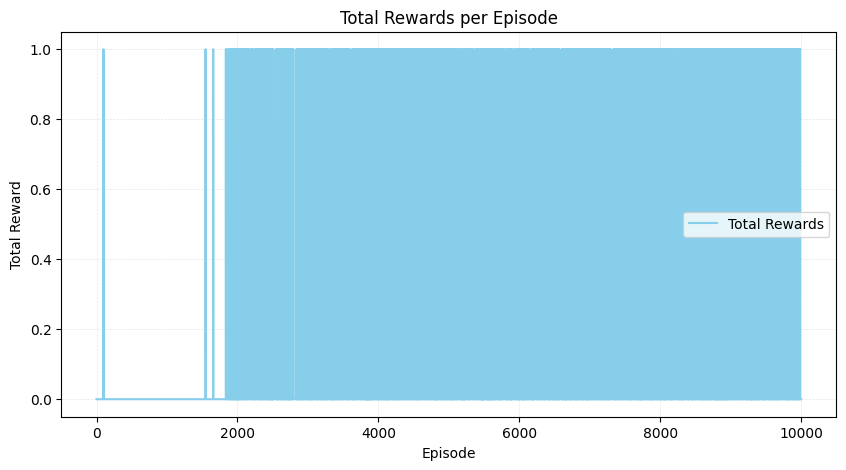

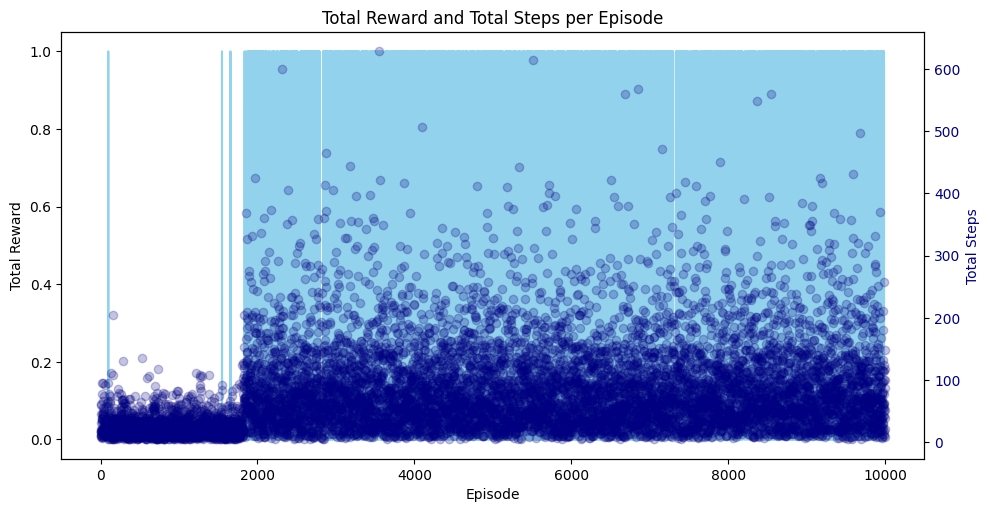

In [34]:
def plot_total_rewards(total_rewards):
    plt.figure(figsize=(10, 5))
    plt.plot(total_rewards, label='Total Rewards', color='#87CEEB')
    plt.title('Total Rewards per Episode')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.legend()
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.2) 
    plt.show()

def calculate_sum_rewards(total_rewards):
    sum_rewards = np.cumsum(total_rewards)
    return sum_rewards

def plot_rewards_episodes(total_rewards, sum_rewards):
    fig, ax1 = plt.subplots(figsize=(10, 5))

    color1 = '#87CEEB'  # Light blue color for total rewards
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Total Reward', color=color1)
    ax1.plot(total_rewards, label='Total Reward', color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)

    ax2 = ax1.twinx()
    color2 = '#FFA500'  # Orange color for sum of rewards per episode
    ax2.set_ylabel('Sum of Rewards', color=color2)
    ax2.plot(sum_rewards, label='Sum of Rewards', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)

    fig.tight_layout()
    plt.title('Total Reward and Sum of Rewards per Episode')
    plt.show()


sum_rewards = calculate_sum_rewards(total_rewards)
plot_rewards_episodes(total_rewards, sum_rewards)
plot_total_rewards(total_rewards)
# Call the combined plot function
plot_rewards_and_steps(total_rewards, total_steps)
